# Dirichlet BC

In [1]:
# This is only valid when the package is not installed
import sys
sys.path.append('../../') # two folders up

In [2]:
import DeepINN as dp

Using default backend: PyTorch
Using Pytorch:  2.0.1+cu117


In [3]:
# Let us make a simple rectangle
X = dp.spaces.R2('x') #  2D space stencil
R = dp.domains.Parallelogram(X, [0,0], [1,0], [0,1])

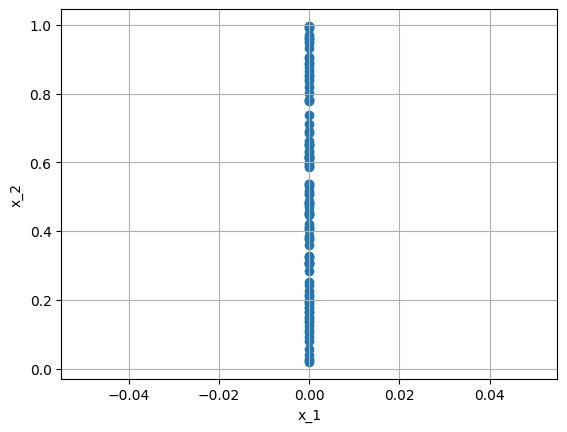

In [4]:
# Sample points
collocation_points = dp.samplers.RandomUniformSampler(R, n_points = 50)
left_boundary = dp.samplers.RandomUniformSampler(R.boundary, n_points = 100, filter_fn=lambda x: x[:,0]==0.0)
dp.utils.scatter(X, left_boundary)

In [5]:
# bc without filter
bc_points = dp.constraint.DirichletBC(geom = R,
                                    function = lambda X: X[:,0]**2,
                                    sampling_strategy = "random",
                                    no_points = 100 )
# bc with filter
bc_points_right = dp.constraint.DirichletBC(geom = R,
                                            function = lambda X: X[:,0]**2,
                                            sampling_strategy = "random",
                                            no_points = 100,
                                            filter_fn = lambda x: x[:,0]==1.0 )

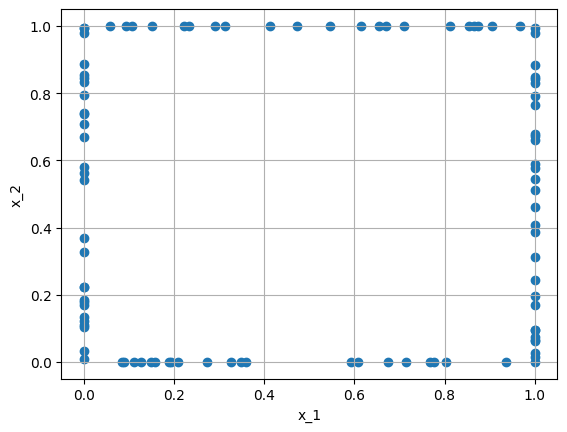

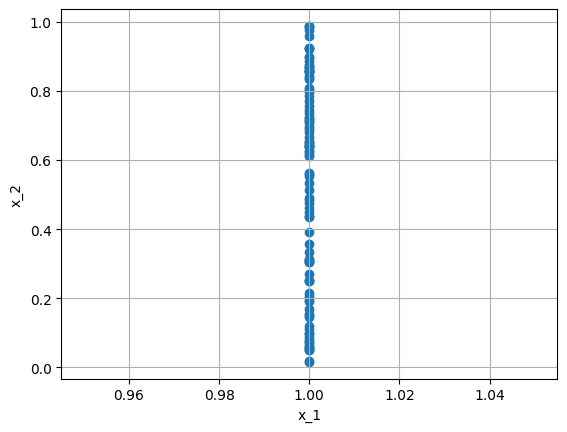

In [6]:
dp.utils.scatter(X, bc_points.sampler_object())
dp.utils.scatter(X, bc_points_right.sampler_object())

In [7]:
# manually sample points
bc_points_sampled = bc_points.sampler_object().sample_points().as_tensor
bc_points_sampled.size()

torch.Size([100, 2])

In [8]:
bc_points_right_sampled = bc_points_right.sampler_object().sample_points().as_tensor
bc_points_right_sampled.size()

torch.Size([100, 2])

In [9]:
# Sample BC labels
# unsqueeze adds a dimension to resulting tensor of size [100]
bc_points_sampled_labels = bc_points.sample_labels(bc_points_sampled).unsqueeze(1)
bc_points_sampled_labels.size()

torch.Size([100, 1])

In [10]:
bc_points_sampled_right_labels = bc_points_right.sample_labels(bc_points_right_sampled).unsqueeze(1)
bc_points_sampled_right_labels.size()

torch.Size([100, 1])

In [11]:
import matplotlib.pyplot as plt

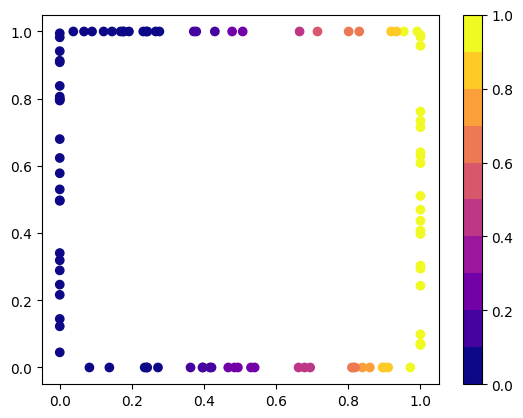

In [12]:
# The variation in BCs based on the provided function : lambda X: X[:,0]**2
plt.scatter(bc_points_sampled[:,0], bc_points_sampled[:,1], c = bc_points_sampled_labels, cmap=plt.get_cmap('plasma', 10))
plt.colorbar()

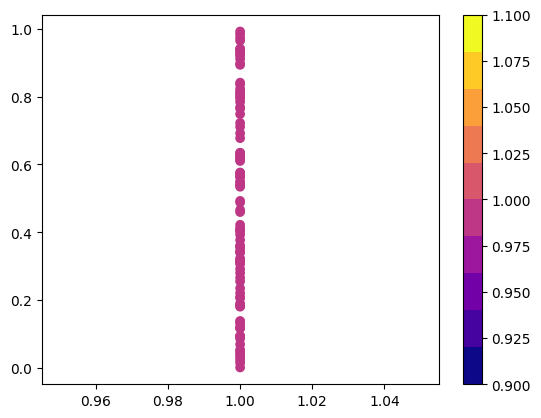

In [13]:
# The variation in BCs based on the provided function : lambda X: X[:,0]**2
plt.scatter(bc_points_right_sampled[:,0], bc_points_right_sampled[:,1], c = bc_points_sampled_right_labels, cmap=plt.get_cmap('plasma', 10))
plt.colorbar()